In [ ]:
import pandas as pd #for tasks related to data : import, export, manipulation
import numpy as np #for numerical tasks

import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #mutlidimesions plot

In [ ]:
df = pd.read_csv("/content/hotel_bookings.csv") #import the data is the project
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,09-06-2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,09-07-2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,09-07-2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,09-07-2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,09-07-2017


# Cleaning the data

In [ ]:
df.shape

(119390, 32)

In [ ]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
#not available data
def data_clean(df):
    df.fillna(0,inplace = True) #zero imputation
    print(df.isnull().sum())

In [ ]:
data_clean(df)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
list_cols = ["children", "adults", "babies"]

for i in list_cols:
    print(f"{i} has unique values as {df[i].unique()}")

children has unique values as [ 0.  1.  2. 10.  3.]
adults has unique values as [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
babies has unique values as [ 0  1  2 10  9]


In [ ]:
#clean the data

filtered_data = (df['children'] == 0) & (df['adults'] == 0 ) & (df['babies'] == 0) #noone came dirty data

final_data = df[~filtered_data] #filter it out

In [ ]:
final_data.shape

(119210, 32)

# Where do the guest come from? (Spatial Analysis)

In [ ]:
country_wise_data = final_data[final_data['is_canceled'] == 0]['country'].value_counts().reset_index()


country_wise_data.columns = ["Country", "No.of guests"]
print(country_wise_data)

    Country  No.of guests
0       PRT         20977
1       GBR          9668
2       FRA          8468
3       ESP          6383
4       DEU          6067
..      ...           ...
161     KIR             1
162     ATF             1
163     TJK             1
164     SLE             1
165     FRO             1

[166 rows x 2 columns]


In [ ]:
import plotly.express as px

In [ ]:
map_guests = px.choropleth(country_wise_data, locations = country_wise_data['Country'],
                           color = country_wise_data["No.of guests"],
                           hover_name = country_wise_data['Country'],
                           title = "Home country of guests"
                           )

map_guests.show()

# How much do guests pay for a room per night?

In [ ]:
final_data["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
final_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,07-02-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,07-02-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,07-03-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,09-06-2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,09-07-2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,09-07-2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,09-07-2017


In [ ]:
data = final_data[final_data["is_canceled"] == 0]

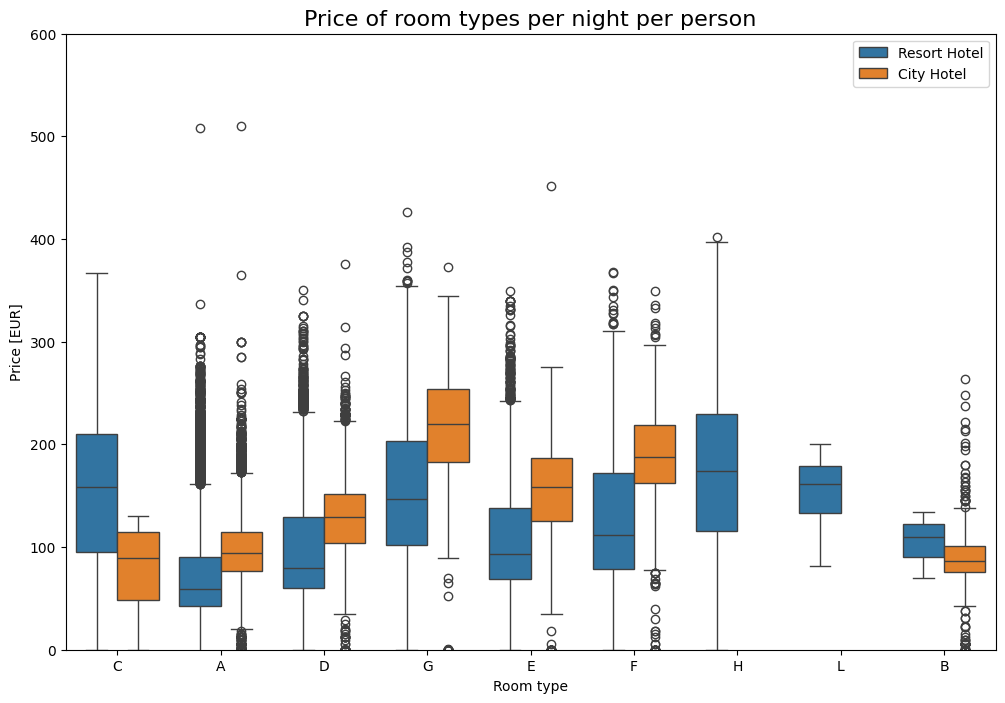

In [ ]:
#boxplot
plt.figure(figsize = (12,8)) #default

sns.boxplot(x = "reserved_room_type",
           y = "adr",
           hue = "hotel", data = data)

plt.title("Price of room types per night per person", fontsize = 16)
plt.xlabel("Room type")
plt.ylabel("Price [EUR]")
plt.legend(loc = "upper right")
plt.ylim(0,600)
plt.show()

# How does the price per night(adr) vary over the year?

In [ ]:
final_data["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
data_resort = final_data[(final_data["hotel"] == "Resort Hotel") & (final_data["is_canceled"] == 0)]


data_city =  final_data[(final_data["hotel"] == "City Hotel") & (final_data["is_canceled"] == 0)]

In [ ]:
#resort hotel: variable: data_resort

#adr attribute:

#how many people came to resort hotel per month
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()

In [ ]:
#how many people came to city hotel per month
city_hotel = data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()

In [ ]:
final = resort_hotel.merge(city_hotel, on = "arrival_date_month")

final.columns = ["month", "price_for_resort_hotel", "price_for_city_hotel"]

In [ ]:
print(final)

        month  price_for_resort_hotel  price_for_city_hotel
0       April               75.867816            111.962267
1      August              181.205892            118.674598
2    December               68.410104             88.401855
3    February               54.147478             86.520062
4     January               48.761125             82.330983
5        July              150.122528            115.818019
6        June              107.974850            117.874360
7       March               57.056838             90.658533
8         May               76.657558            120.669827
9    November               48.706289             86.946592
10    October               61.775449            102.004672
11  September               96.416860            112.776582


# Sort the month

In [ ]:
from calendar import month_name

def sort_month(df, colname):
    month_dict = { j:i for i,j in enumerate(month_name) } #dictionary comprehension
    df["month_num"] = df[colname].apply(lambda x: month_dict[x])
    return df.sort_values(by = "month_num").reset_index().drop(['index', 'month_num'], axis =1)


In [ ]:
sort_month(final, "month")

,month,price_for_resort_hotel,price_for_city_hotel
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


<Axes: xlabel='month'>

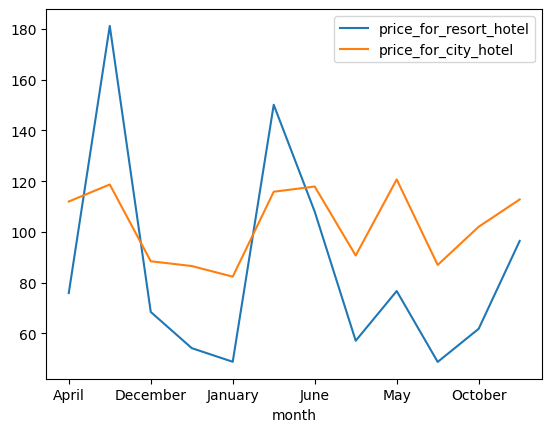

In [ ]:
final.plot(kind = "line", x = "month", y= ['price_for_resort_hotel','price_for_city_hotel'])

# Which are the most busy month or in which month Guests are high?

In [ ]:
data_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,07-02-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,07-02-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,07-03-2015


In [ ]:
rush_resort = data_resort["arrival_date_month"].value_counts().reset_index()
rush_resort.columns = ["month", "no.of guests"]

print(rush_resort)

        month  no.of guests
0      August          3257
1        July          3137
2     October          2575
3       March          2571
4       April          2550
5         May          2535
6    February          2308
7   September          2102
8        June          2037
9    December          2014
10   November          1975
11    January          1866


In [ ]:
rush_city = data_city["arrival_date_month"].value_counts().reset_index()
rush_city.columns = ["month", "no.of guests"]

print(rush_city)

        month  no.of guests
0      August          5367
1        July          4770
2         May          4568
3        June          4358
4     October          4326
5   September          4283
6       March          4049
7       April          4010
8    February          3051
9    November          2676
10   December          2377
11    January          2249


In [ ]:
#merge two data from rush_resort , rush_city

final_rush = rush_resort.merge(rush_city, on = "month")

final_rush.columns = ["month", "no of guests in resort hotel" , "no of guests in city hotel"]

final_rush

,month,no of guests in resort hotel,no of guests in city hotel
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [ ]:
final_rush = sort_month(final_rush, "month")
print(final_rush)

        month  no of guests in resort hotel  no of guests in city hotel
0     January                          1866                        2249
1    February                          2308                        3051
2       March                          2571                        4049
3       April                          2550                        4010
4         May                          2535                        4568
5        June                          2037                        4358
6        July                          3137                        4770
7      August                          3257                        5367
8   September                          2102                        4283
9     October                          2575                        4326
10   November                          1975                        2676
11   December                          2014                        2377


<Axes: xlabel='month'>

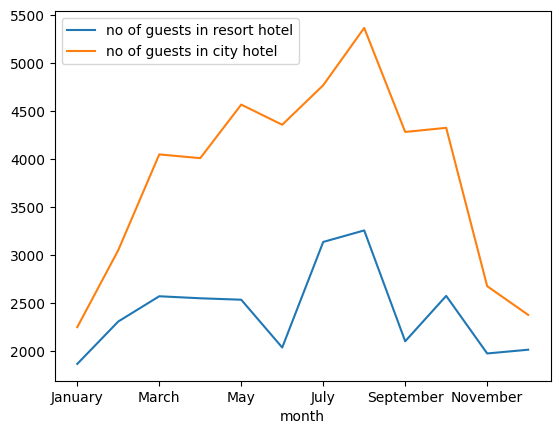

In [ ]:
#plot line plot month vs no of guests

final_rush.plot(kind = "line", x = "month",
                y = ["no of guests in resort hotel", "no of guests in city hotel"])

# How long do people stay at the hotels?

In [ ]:
filter_condition = final_data['is_canceled'] == 0

clean_data = final_data[filter_condition]

In [ ]:
clean_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,07-02-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,07-02-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,07-03-2015


In [ ]:
clean_data["total_nights"] = clean_data["stays_in_weekend_nights"] + clean_data["stays_in_week_nights"]

<ipython-input-55-1f0b759752e5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
clean_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,07-01-2015,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,07-01-2015,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,07-02-2015,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,07-02-2015,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,07-03-2015,2


In [ ]:
stay = clean_data.groupby(["total_nights", "hotel"]).agg('count').reset_index()

stay = stay.iloc[:, 0:3]
print(stay)

    total_nights         hotel  is_canceled
0              0    City Hotel          251
1              0  Resort Hotel          371
2              1    City Hotel         9155
3              1  Resort Hotel         6579
4              2    City Hotel        10983
..           ...           ...          ...
57            46  Resort Hotel            1
58            48    City Hotel            1
59            56  Resort Hotel            1
60            60  Resort Hotel            1
61            69  Resort Hotel            1

[62 rows x 3 columns]


In [ ]:
stay = stay.rename(columns = {'is_canceled': 'Number of stays'})

In [ ]:
print(stay)

    total_nights         hotel  Number of stays
0              0    City Hotel              251
1              0  Resort Hotel              371
2              1    City Hotel             9155
3              1  Resort Hotel             6579
4              2    City Hotel            10983
..           ...           ...              ...
57            46  Resort Hotel                1
58            48    City Hotel                1
59            56  Resort Hotel                1
60            60  Resort Hotel                1
61            69  Resort Hotel                1

[62 rows x 3 columns]


<Axes: xlabel='total_nights', ylabel='Number of stays'>

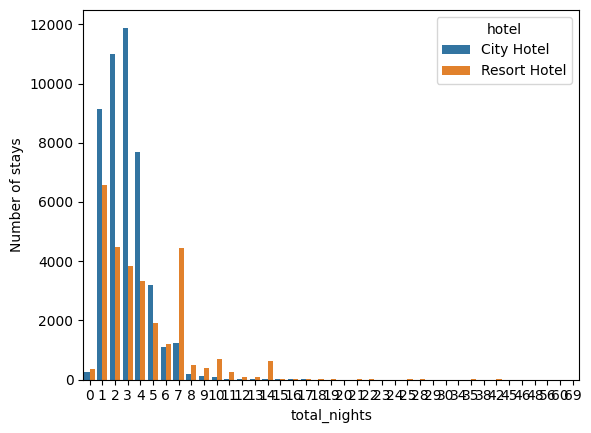

In [ ]:
#plot the barplot

sns.barplot(x = "total_nights", y = "Number of stays" , hue = "hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data = stay)

# Select Important Numerical Features using Co-relation

In [ ]:
correlation = final_data.corr(numeric_only=True)


In [ ]:
correlation = correlation["is_canceled"][1:]

In [ ]:
correlation.abs().sort_values(ascending = False )

,is_canceled
lead_time,0.292876
total_of_special_requests,0.234877
required_car_parking_spaces,0.195701
booking_changes,0.144832
previous_cancellations,0.110139
is_repeated_guest,0.083745
company,0.083594
adults,0.058182
previous_bookings_not_canceled,0.057365
days_in_waiting_list,0.054301


In [ ]:
list_not = ["days_in_waiting_list", "arrival_date_year"]

In [ ]:
num_features = [col for col in final_data.columns if final_data[col].dtype != "0" and col not in list_not] #numerical one

In [ ]:
print(num_features)

['hotel', 'is_canceled', 'lead_time', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


# Select important Categorical features

In [ ]:
final_data["reservation_status"].value_counts()

,count
reservation_status,
Check-Out,75011
Canceled,42993
No-Show,1206


In [ ]:
final_data.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
cat_not = ["country", "reservation_status", "booking_changes", "assigned_room_type", "days_in_waiting_list"]

In [ ]:
cat_features = [col for col in final_data.columns
                if final_data[col].dtype == "0" and col not in cat_not]

In [ ]:
cat_features = final_data.select_dtypes(include=['object', 'category']).columns.tolist()
print(cat_features)


['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


In [ ]:
print(num_features)

['hotel', 'is_canceled', 'lead_time', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [ ]:
data_cat = final_data[cat_features]

In [ ]:
print(data_cat.head())

          hotel arrival_date_month  ... reservation_status reservation_status_date
0  Resort Hotel               July  ...          Check-Out              07-01-2015
1  Resort Hotel               July  ...          Check-Out              07-01-2015
2  Resort Hotel               July  ...          Check-Out              07-02-2015
3  Resort Hotel               July  ...          Check-Out              07-02-2015
4  Resort Hotel               July  ...          Check-Out              07-03-2015

[5 rows x 12 columns]


In [ ]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

data_cat["reservation_status_date"] = pd.to_datetime(data_cat["reservation_status_date"], errors='coerce')


In [ ]:
data_cat["year"] = data_cat["reservation_status_date"].dt.year

data_cat["month"] = data_cat["reservation_status_date"].dt.month

data_cat["day"] = data_cat["reservation_status_date"].dt.day

In [ ]:
data_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,year,month,day
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01,2015.0,7.0,1.0
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01,2015.0,7.0,1.0
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02,2015.0,7.0,2.0
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02,2015.0,7.0,2.0
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03,2015.0,7.0,3.0


In [ ]:
data_cat.drop("reservation_status_date", axis = 1, inplace = True)

In [ ]:
data_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,year,month,day
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015.0,7.0,1.0
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015.0,7.0,1.0
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015.0,7.0,2.0
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015.0,7.0,2.0
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015.0,7.0,3.0


# Feature Encoding

## Mean Encoding Technique

In [ ]:
data_cat.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status', 'year', 'month',
       'day'],
      dtype='object')

In [ ]:
data_cat["cancellation"] = final_data["is_canceled"]

In [ ]:
print(data_cat)

               hotel arrival_date_month meal  ... month  day cancellation
0       Resort Hotel               July   BB  ...   7.0  1.0            0
1       Resort Hotel               July   BB  ...   7.0  1.0            0
2       Resort Hotel               July   BB  ...   7.0  2.0            0
3       Resort Hotel               July   BB  ...   7.0  2.0            0
4       Resort Hotel               July   BB  ...   7.0  3.0            0
...              ...                ...  ...  ...   ...  ...          ...
119385    City Hotel             August   BB  ...   9.0  6.0            0
119386    City Hotel             August   BB  ...   9.0  7.0            0
119387    City Hotel             August   BB  ...   9.0  7.0            0
119388    City Hotel             August   BB  ...   9.0  7.0            0
119389    City Hotel             August   HB  ...   9.0  7.0            0

[119210 rows x 15 columns]


In [ ]:
def mean_encode(df, col, mean_col):
    df_dict = df.groupby([col])[mean_col].mean().to_dict()
    df[col] = df[col].map(df_dict)
    return df

for col in data_cat.columns[0:8]:
    data_cat = mean_encode(data_cat, col, "cancellation")



In [ ]:
data_cat.drop(["cancellation"], axis = 1, inplace = True)

In [ ]:
print(data_cat)

           hotel  arrival_date_month      meal  ...    year  month  day
0       0.277674            0.374644  0.374106  ...  2015.0    7.0  1.0
1       0.277674            0.374644  0.374106  ...  2015.0    7.0  1.0
2       0.277674            0.374644  0.374106  ...  2015.0    7.0  2.0
3       0.277674            0.374644  0.374106  ...  2015.0    7.0  2.0
4       0.277674            0.374644  0.374106  ...  2015.0    7.0  3.0
...          ...                 ...       ...  ...     ...    ...  ...
119385  0.417859            0.377823  0.374106  ...  2017.0    9.0  6.0
119386  0.417859            0.377823  0.374106  ...  2017.0    9.0  7.0
119387  0.417859            0.377823  0.374106  ...  2017.0    9.0  7.0
119388  0.417859            0.377823  0.374106  ...  2017.0    9.0  7.0
119389  0.417859            0.377823  0.344653  ...  2017.0    9.0  7.0

[119210 rows x 14 columns]


# Preparing our data

In [ ]:
num_data = final_data[num_features] #numerical data

cat_data = data_cat #categorical data

dataframe = pd.concat([num_data, cat_data], axis = 1)

In [ ]:
print(dataframe)

               hotel  is_canceled  lead_time  ...    year  month  day
0       Resort Hotel            0        342  ...  2015.0    7.0  1.0
1       Resort Hotel            0        737  ...  2015.0    7.0  1.0
2       Resort Hotel            0          7  ...  2015.0    7.0  2.0
3       Resort Hotel            0         13  ...  2015.0    7.0  2.0
4       Resort Hotel            0         14  ...  2015.0    7.0  3.0
...              ...          ...        ...  ...     ...    ...  ...
119385    City Hotel            0         23  ...  2017.0    9.0  6.0
119386    City Hotel            0        102  ...  2017.0    9.0  7.0
119387    City Hotel            0         34  ...  2017.0    9.0  7.0
119388    City Hotel            0        109  ...  2017.0    9.0  7.0
119389    City Hotel            0        205  ...  2017.0    9.0  7.0

[119210 rows x 44 columns]


# Handle the outliers

In [ ]:
dataframe.describe()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,adr,required_car_parking_spaces,total_of_special_requests,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,year,month,day
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,46893.000000,46893.000000,46893.000000
mean,0.370766,104.109227,27.163376,15.798717,0.927053,2.499195,1.859206,0.104043,0.007961,0.031499,0.087191,0.137094,0.218799,74.889078,10.735400,101.969092,0.062553,0.571504,0.370766,0.370766,0.370766,0.370766,0.370766,0.370766,0.370766,0.370766,2016.113364,6.265306,6.397181
std,0.483012,106.875450,13.601107,8.781070,0.995117,1.897106,0.575186,0.398836,0.097509,0.174663,0.844918,1.498137,0.638504,107.168884,53.830143,50.434007,0.245360,0.792876,0.066212,0.033756,0.024433,0.174842,0.128967,0.085574,0.035148,0.097361,0.717456,3.345053,3.462592
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.277674,0.305016,0.244654,0.000000,0.122253,0.174868,0.292683,0.013928,2015.000000,1.000000,1.000000
25%,0.000000,18.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,69.500000,0.000000,0.000000,0.277674,0.334451,0.374106,0.202310,0.343313,0.410598,0.330827,0.251373,2016.000000,3.000000,3.000000
50%,0.000000,69.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,94.950000,0.000000,0.000000,0.417859,0.377823,0.374106,0.273438,0.367590,0.410598,0.391567,0.445055,2016.000000,6.000000,6.000000
75%,1.000000,161.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000,0.417859,0.397029,0.374106,0.567333,0.367590,0.410598,0.391567,0.445055,2017.000000,9.000000,9.000000
max,1.000000,737.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,543.000000,5400.000000,8.000000,5.000000,0.417859,0.414860,0.598997,1.000000,1.000000,0.800000,0.407654,1.000000,2017.000000,12.000000,12.000000


<Axes: xlabel='lead_time', ylabel='Density'>

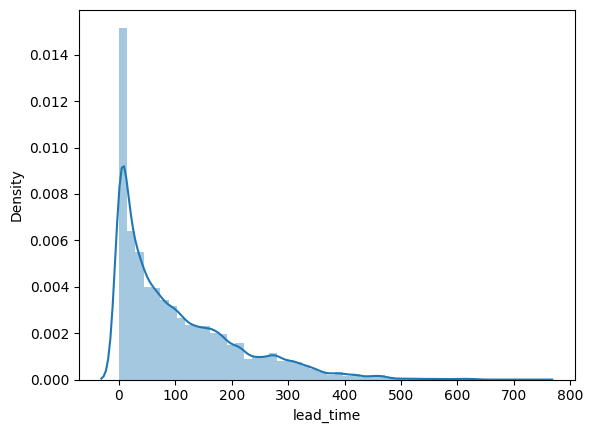

In [ ]:
#using seaborn library
sns.distplot(dataframe["lead_time"])

In [ ]:
def handle_outlier(col):
    dataframe[col] = np.log1p(dataframe[col])

In [ ]:
handle_outlier("lead_time")

<Axes: xlabel='lead_time', ylabel='Density'>

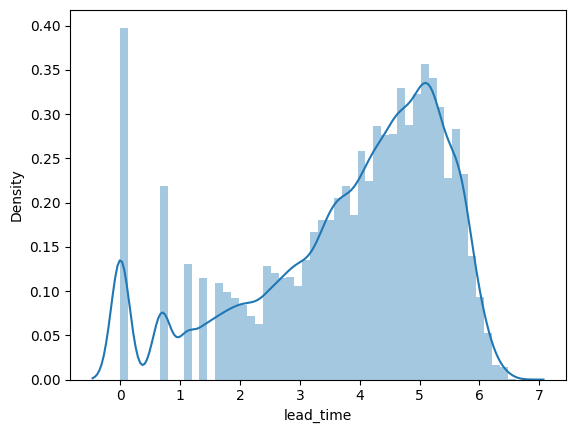

In [ ]:
sns.distplot(dataframe["lead_time"].dropna())

<Axes: xlabel='adr', ylabel='Density'>

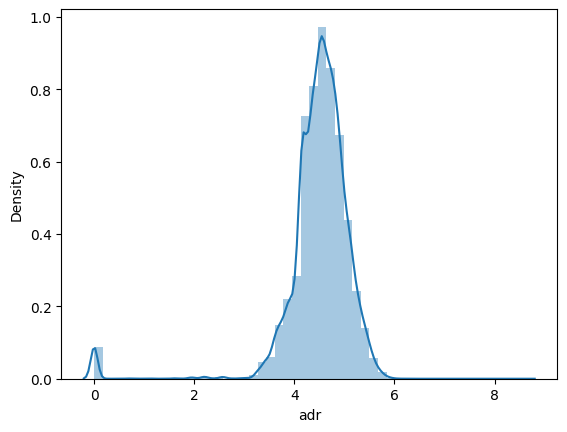

In [ ]:
sns.distplot(dataframe["adr"])

In [ ]:
handle_outlier("adr")

In [ ]:
dataframe.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,0


In [ ]:
dataframe.dropna(inplace = True)

# Feature Importance

In [ ]:
##separate dependent and independent variables

y = dataframe["is_canceled"] #dependent variable

X = dataframe.drop("is_canceled", axis =1) #independent

In [ ]:
X.columns

Index(['hotel', 'lead_time', 'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'hotel', 'arrival_date_month', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_status', 'year', 'month', 'day'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [ ]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [ ]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel_model.fit(X_encoded, y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [ ]:
selected_feat_mask = feature_sel_model.get_support()

In [ ]:
selected_features = X_encoded.columns[selected_feat_mask]

In [ ]:
print("Selected Features:\n", selected_features.tolist())

Selected Features:
 ['lead_time', 'arrival_date_day_of_month', 'company', 'reservation_status_Check-Out']


In [ ]:
print("Total selected features:", selected_feat_mask.sum())


Total selected features: 4


In [ ]:
cols = X.columns
print(cols)

Index(['hotel', 'lead_time', 'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'hotel', 'arrival_date_month', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_status', 'year', 'month', 'day'],
      dtype='object')


In [ ]:
# Check again if any non-numeric columns are present
print(X.dtypes[X.dtypes == 'object'])

# If so, apply encoding (e.g., OneHotEncoder or pd.get_dummies)
X_encoded = pd.get_dummies(X, drop_first=True)


hotel                      object
arrival_date_month         object
meal                       object
country                    object
market_segment             object
distribution_channel       object
reserved_room_type         object
assigned_room_type         object
deposit_type               object
customer_type              object
reservation_status         object
reservation_status_date    object
deposit_type               object
customer_type              object
reservation_status         object
dtype: object


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Create model on numeric data
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))

# Fit the model — this is required!
feature_sel_model.fit(X_encoded, y)


SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [ ]:
selected_feature_mask = feature_sel_model.get_support()
selected_features = X_encoded.columns[selected_feature_mask]
print(selected_features)


Index(['lead_time', 'arrival_date_day_of_month', 'company',
       'reservation_status_Check-Out'],
      dtype='object')


In [ ]:
print(f"Total features {X.shape[1]}")

Total features 43


In [ ]:
print(f"Selected features: {len(selected_features)}")


Selected features: 4


In [ ]:
X.columns

Index(['hotel', 'lead_time', 'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'hotel', 'arrival_date_month', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_status', 'year', 'month', 'day'],
      dtype='object')

In [ ]:
X.head()

,hotel,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,year,month,day
0,Resort Hotel,5.837730,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,Transient,0.000000,0,0,Check-Out,07-01-2015,0.277674,0.374644,0.374106,0.567333,0.153712,0.174868,0.330827,0.188186,No Deposit,Transient,Check-Out,2015.0,7.0,1.0
1,Resort Hotel,6.603944,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,Transient,0.000000,0,0,Check-Out,07-01-2015,0.277674,0.374644,0.374106,0.567333,0.153712,0.174868,0.330827,0.188186,No Deposit,Transient,Check-Out,2015.0,7.0,1.0
2,Resort Hotel,2.079442,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,Transient,4.330733,0,0,Check-Out,07-02-2015,0.277674,0.374644,0.374106,0.202310,0.153712,0.174868,0.391567,0.188186,No Deposit,Transient,Check-Out,2015.0,7.0,2.0
3,Resort Hotel,2.639057,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,Transient,4.330733,0,0,Check-Out,07-02-2015,0.277674,0.374644,0.374106,0.202310,0.187618,0.220568,0.391567,0.445055,No Deposit,Transient,Check-Out,2015.0,7.0,2.0
4,Resort Hotel,2.708050,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,Transient,4.595120,0,1,Check-Out,07-03-2015,0.277674,0.374644,0.374106,0.202310,0.367590,0.410598,0.391567,0.445055,No Deposit,Transient,Check-Out,2015.0,7.0,3.0


In [ ]:
print(df.columns)  # Check the columns first to make sure 'is_canceled' exists

y = df['is_canceled']  # Extract target column from the DataFrame
print(type(y))  # Confirm it's a Series
print(y.head())  # Preview data

y = y.reset_index(drop=True)  # Optional: reset index if needed



Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')
<class 'pandas.core.series.Series'>
0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64


# Splitting the data and model building

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

data = load_iris()
X = data.data
y = data.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=45)



# Implement logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train) #training of the model

LogisticRegression()

In [ ]:
y_pred = logistic_model.predict(x_test) #prediction by model

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_pred)



array([[37,  0,  0],
       [ 0, 38,  3],
       [ 0,  0, 35]])

In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
accuracy_score(y_test, y_pred)

0.9734513274336283

# We are implementing different classification algorithms


### logistic regression
### Naive Bayes
### Random Forest
### Decision Tree
### KNN


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [ ]:
models = []

models.append(("Naive Bayes", GaussianNB()))
models.append(("Random Forest", RandomForestClassifier()))
models.append(("Decision Tree", DecisionTreeClassifier()))
models.append(("KNN", KNeighborsClassifier(n_neighbors = 5)))


In [ ]:
for name, model in models:
    print(name)
    model.fit(x_train, y_train)

    #make a predictions
    predictions = model.predict(x_test)

    #evaluate a model
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(y_test, predictions))

    from sklearn.metrics import accuracy_score
    print(accuracy_score(predictions, y_test))

    print("\n")

Naive Bayes
[[37  0  0]
 [ 0 39  2]
 [ 0  3 32]]
0.9557522123893806


Random Forest
[[37  0  0]
 [ 0 39  2]
 [ 0  4 31]]
0.9469026548672567


Decision Tree
[[37  0  0]
 [ 0 39  2]
 [ 0  4 31]]
0.9469026548672567


KNN
[[37  0  0]
 [ 0 38  3]
 [ 0  3 32]]
0.9469026548672567


